<a href="https://colab.research.google.com/github/anjalipatel34/GripTask1/blob/main/GRIP_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 - To Explore Unsupervised Machine Learning

<a href="https://colab.research.google.com/github/jhanvipankhania/TASKS_FOR_Internship/blob/master/GRIP_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From the given ‘Iris’ dataset, we predict the optimum number of
clusters and represent it visually.

**A little introduction to Unsupervised Machine Learning:**


*   The machine is not provided with any labelled training data
*   It finds a pattern within the data to discover the intrinsic properties of the data





Now, with context to KNN, note that,


*   KNN is a Classification/Regression algorithm that takes a bunch of labelled data points and uses them to learn how to label other points.
*   Classifies based on similarity to other data points.
*   It is based on ‘similar cases with the same class labels that are near each other’
*   We have labels for all our data- we know what class each piece of the data should fall into. 
*   So, when we are given a new piece of data without a label, we compare that new piece of data to the existing data- every piece of existing data. 
*   We then take the most similar pieces of data(the nearest neighbours) and look at their labels
*   K= number of nearest neighbours to examine




In [ ]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns



I'll give you a brief intro on these libraries:

*    Numpy - It is majorly used for solving mathematical equations and we will be needing this library for evaluating our model
*    Pandas - It provides best tools for quick analysis in preparing and loading the data
*    Matplotlib, Seaborn - It will help us plot visualisations
*    Kmeans - to apply kmeans algorithm to our dataset




## Load Dataset

In [4]:
#load the dataset
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [6]:
#read the dataset
import pandas as pd
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Analyze Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


No null values, great!

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Here, 25% -> quantile value and thus, 25% of the flowers have sepallength value lower than or equal to 38.25 and similarly we can check for others.

50% -> median value and this,50% of the flowers have sepallength lower than or equal to 75.5 and similarly we can check for others.


In [9]:
print(df.shape)

(150, 6)


150 -> rows

6 -> columns

In [10]:
print("What categories are there and how many instances for each category?\n")
print(df["Species"].value_counts())
print("\n\nWhat are the unique categories?")
print(df["Species"].unique())
# How many unique values are there
print("\n\nHow many unique categories there are?")
print(df["Species"].nunique())

What categories are there and how many instances for each category?

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


What are the unique categories?
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


How many unique categories there are?
3


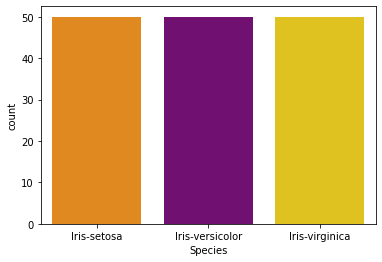

In [12]:
import seaborn as sns
colours = ["darkorange", "purple", "gold"]
sns.countplot(x='Species', data=df, palette=colours)

## Visualization

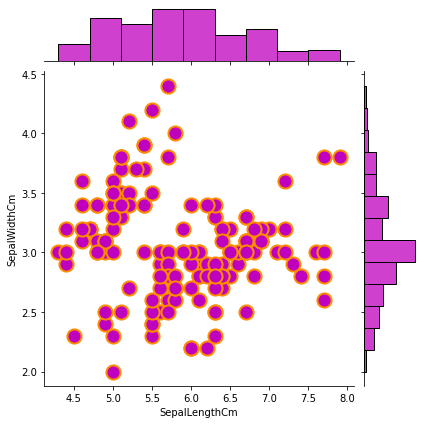

In [13]:
sns.jointplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], kind='scatter', s=200, color='m', edgecolor="darkorange", linewidth=2)

Roughly, we can say that sepal.length and sepal.width are positively correlated(as width increases with length)


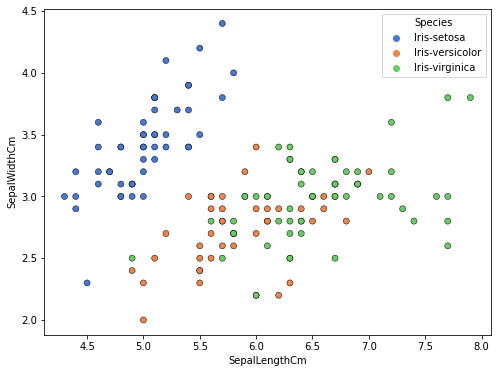

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', palette="muted", edgecolor="black")

We can observe that

For setosa, max. sepal length is less than 6 cm -> smaller sepal length However, sepalwidth is largest than other two categories

For Versicolor, majority of sepal length is between 5.5 and 6.5 -> quite smaller sepal length as well

For Virginica, sepal length is the largest


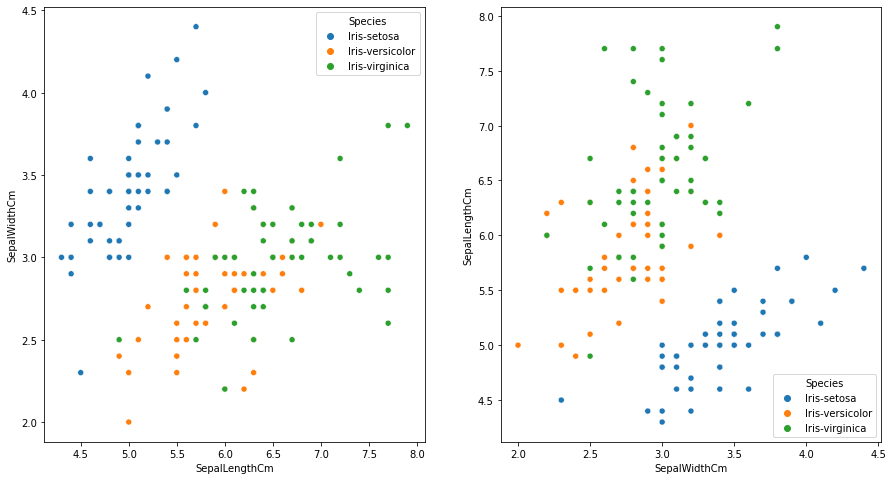

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', data=df)

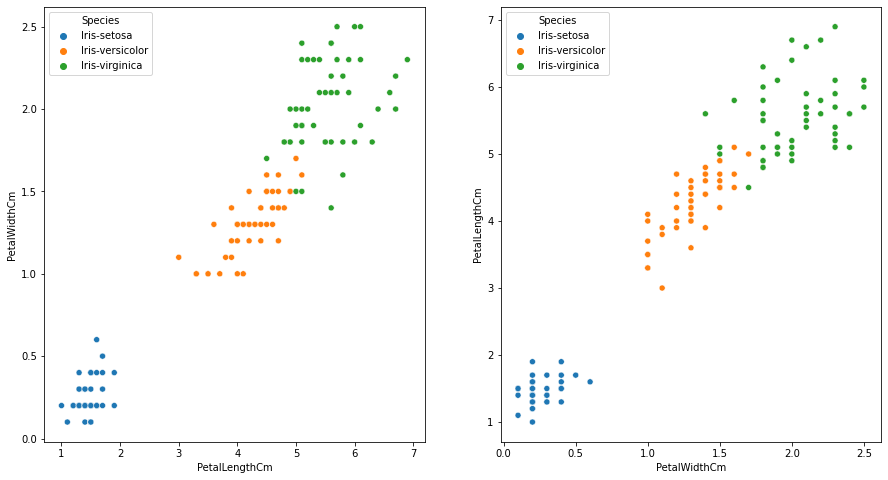

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='PetalWidthCm', y='PetalLengthCm', hue='Species', data=df)



Both petal length and width tend to have positive corelation as well !

Setosa -> smallest length

Versicolor -> length is larger than setosa but smaller than virginica

Verginica -> largest length


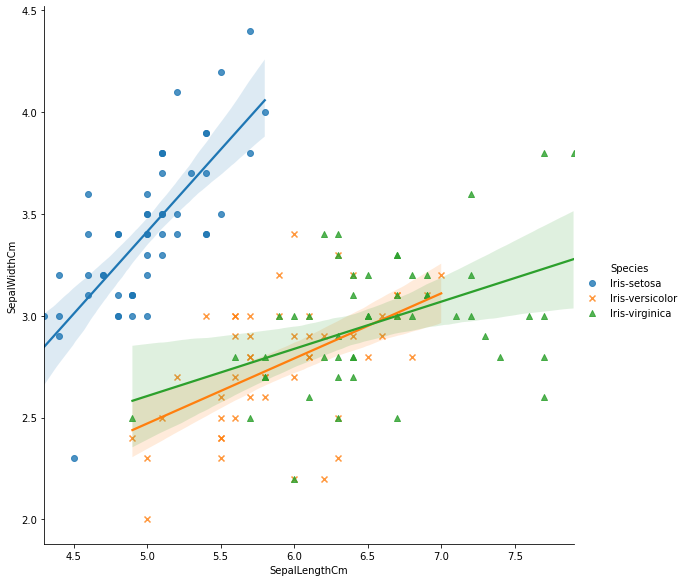

In [18]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, height=8, markers=["o", "x", "^"])

We can say from the graph that the value of sepal width for Setosa changes rapidly with respect to sepal length than the other two categories

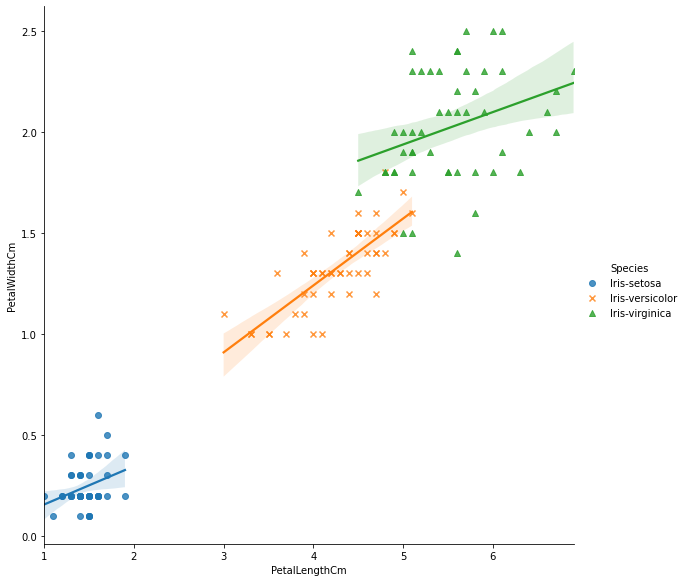

In [19]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df, height=8, markers=["o", "x", "^"])


Here, the slope is steeper for Versicolor than the other two


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


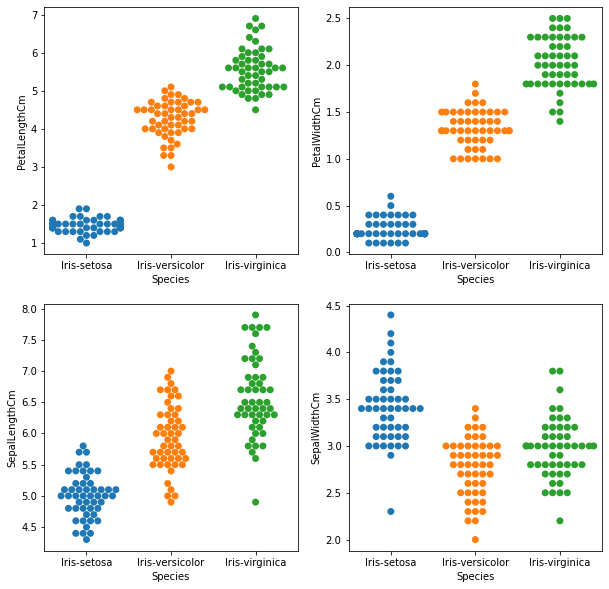

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.swarmplot(x="Species", y="PetalLengthCm", data=df, size=7)
plt.subplot(2, 2, 2)
sns.swarmplot(x="Species", y="PetalWidthCm", data=df, size=7)
plt.subplot(2, 2, 3)
sns.swarmplot(x="Species", y="SepalLengthCm", data=df, size=7)
plt.subplot(2, 2, 4)
sns.swarmplot(x="Species", y="SepalWidthCm", data=df, size=7)



In swarmplot, all the points are visible and pasted side by side. It shows that which particular values are coming how many times. For a dataset small like Iris, its actually good. Swarmplot might not be able to do justice to larger datasets.


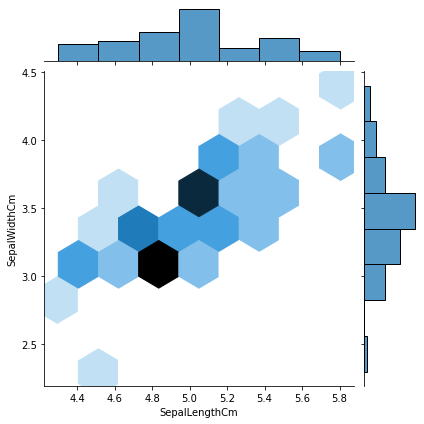

In [21]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", kind='hex', data=df[df["Species"] == "Iris-setosa"])


Wherever you see darker colour, that means there have been high density of points there.


## Implementing the Elbow Method 

The elbow method allows us to pick the optimum amount of clusters for classification.

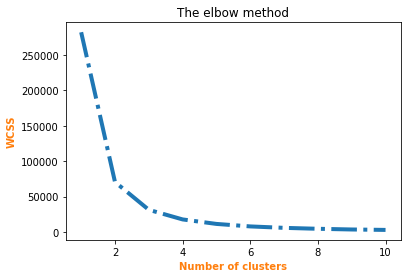

In [23]:
X = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
y = df['Species']
plt.plot(range(1, 11), wcss, linestyle='-.' , linewidth=4)
plt.title('The elbow method')
plt.xlabel('Number of clusters', size='medium', color='C1', weight='semibold')
plt.ylabel('WCSS',  size='medium', color='C1', weight='semibold') #within cluster sum of squares
plt.show()
#print(x.head())
#print(x.shape)
#print(y.head())
#print(y.shape)

In [25]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

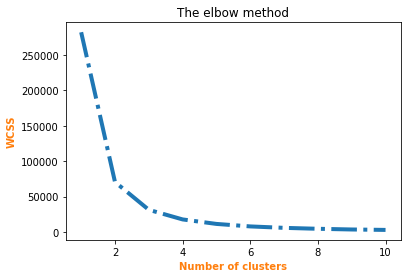

In [26]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, linestyle='-.' , linewidth=4)
plt.title('The elbow method')
plt.xlabel('Number of clusters', size='medium', color='C1', weight='semibold')
plt.ylabel('WCSS',  size='medium', color='C1', weight='semibold') #within cluster sum of squares
plt.show()

We can see that the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

## Implementing KMeans

In [27]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


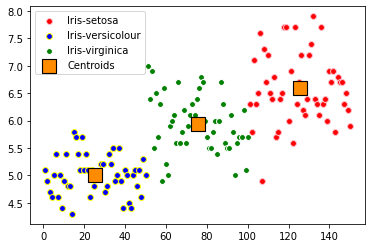

In [28]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 35, c = 'red', label = 'Iris-setosa', edgecolor="pink")
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 35, c = 'blue', label = 'Iris-versicolour', edgecolor="yellow")
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 35, c = 'green', label = 'Iris-virginica', edgecolor="white")

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'darkorange', edgecolor='black',
                label = 'Centroids',s=200,marker=',')
plt.grid(False)
plt.legend()
plt.show()

The optimum number of clusters predicted are visually depicted above